In [1]:
using BioTools
using Plots
using TreeTools
using StatsBase, Statistics, Dates
using Measures, LaTeXStrings, Printf

┌ Info: Recompiling stale cache file /home/pierrebc/.julia/compiled/v1.1/BioTools.ji for BioTools [top-level]
└ @ Base loading.jl:1184


In [2]:
include("../functions/plot_functions.jl")
pyplot()
plot(rand(10),size=(1,1))

In [3]:
lfs = 16 # Legend font size
alfs = 18 # axis label font size
tfs = 18 # title font size
atfs = 18 # axis ticks font size
ga = 0.3 # grid alpha
sizes = (1200,800) # standard size for single plots
rl = 0.065 # position of the "A" or "B" label in % 
ms = 6 # marker size
ls = 6 # line size
plotfolder = "Simulation_NEW"

"Simulation_NEW"

In [4]:
f = "../../../simulation/SimulatedData_AB/simulated_alignment_N10000_mueff0.001_s0.010_dt1000_ABl5_nAB20_nf0.00_Vardt.txt"
fp = Flu.FluPop(f, :int8, (:strain, :fitness, :date));

Reading ../../../simulation/SimulatedData_AB/simulated_alignment_N10000_mueff0.001_s0.010_dt1000_ABl5_nAB20_nf0.00_Vardt.txt...
Read 999619 strains out of 999619. Filtered 0. Could not read 0


In [5]:
    binwidth = Day(30);
    binspacing = Day(30);
Flu.bin_by_date!(fp, binwidth=binwidth, binspacing = binspacing);

  0.000003 seconds (4 allocations: 736 bytes)
  1.410545 seconds (1.18 M allocations: 47.205 MiB)
  1.382488 seconds (1.06 M allocations: 40.830 MiB)
  0.147577 seconds (11.49 k allocations: 496.164 KiB)
  5.758417 seconds (5.03 M allocations: 112.126 MiB, 61.02% gc time)


In [9]:
dt_list = [10,30,100,300,1000];
dt = dt_list[5];

In [10]:
alphabins_ = 0.1:0.1:0.9
alphabins = [(a, 0.05) for a in alphabins_];

In [11]:
pfix(traj) = sum([x.fixation==:fixed for x in traj]) / (sum([x.fixation==:fixed for x in traj]) + sum([x.fixation==:lost for x in traj]));
meanfreq(traj) = mean(t.freq[t.index[:active]] for t in traj)

meanfreq (generic function with 1 method)

In [12]:
function gettrajectories(aln)
    # Data
#     println(aln)
    fp = Flu.FluPop(aln, :int8, (:strain, :fitness, :date));
    binwidth = Day(30);
    binspacing = Day(30);
    Flu.bin_by_date!(fp, binwidth=binwidth, binspacing = binspacing);
    ph_all = Flu.PosEvo(fp);
    # Trajectories
    trajectories = Flu.all_trajectories(ph_all, keep_unfinished=false)
    return trajectories
end
function plotdat(trajectories, alphabins)
    trajectories = Flu.previous_state_condition(trajectories, :lost);
    traj_fb = trajectory_freqbin(trajectories, alphabins);
    for (k,v) in traj_fb
        traj_fb[k] = Flu.population_size_condition(v, 20, mode=:active)
    end
    # 
    return dat = vcat([[meanfreq(traj_fb[x]) pfix(traj_fb[x]) length(traj_fb[x])] for x in alphabins_]...)
end

plotdat (generic function with 1 method)

In [13]:
alltraj = Dict()
for dt in dt_list[1:2:end]
    println(dt)
    aln = "../../../simulation/SimulatedData_AB/simulated_alignment_N10000_mueff0.001_s0.010_dt$(dt)_ABl5_nAB20_nf0.00_Vardt.txt"
    alltraj[dt] = gettrajectories(aln)
end

10
Reading ../../../simulation/SimulatedData_AB/simulated_alignment_N10000_mueff0.001_s0.010_dt10_ABl5_nAB20_nf0.00_Vardt.txt...
Read 1000100 strains out of 1000100. Filtered 0. Could not read 0
  0.000000 seconds (4 allocations: 736 bytes)
  0.651631 seconds (1.00 M allocations: 38.151 MiB)
  0.656367 seconds (1.00 M allocations: 38.151 MiB)
  0.000517 seconds (8.64 k allocations: 331.547 KiB)
  1.072056 seconds (5.00 M allocations: 110.699 MiB)
100       
Reading ../../../simulation/SimulatedData_AB/simulated_alignment_N10000_mueff0.001_s0.010_dt100_ABl5_nAB20_nf0.00_Vardt.txt...
Read 1000181 strains out of 1000181. Filtered 0. Could not read 0
  0.000000 seconds (4 allocations: 736 bytes)
  3.984143 seconds (1.00 M allocations: 38.154 MiB, 83.62% gc time)
  0.643127 seconds (1.00 M allocations: 38.154 MiB)
  0.000672 seconds (8.64 k allocations: 331.547 KiB)
  1.086614 seconds (5.00 M allocations: 110.842 MiB)
1000      
Reading ../../../simulation/SimulatedData_AB/simulated_alignme

# AB

10
100


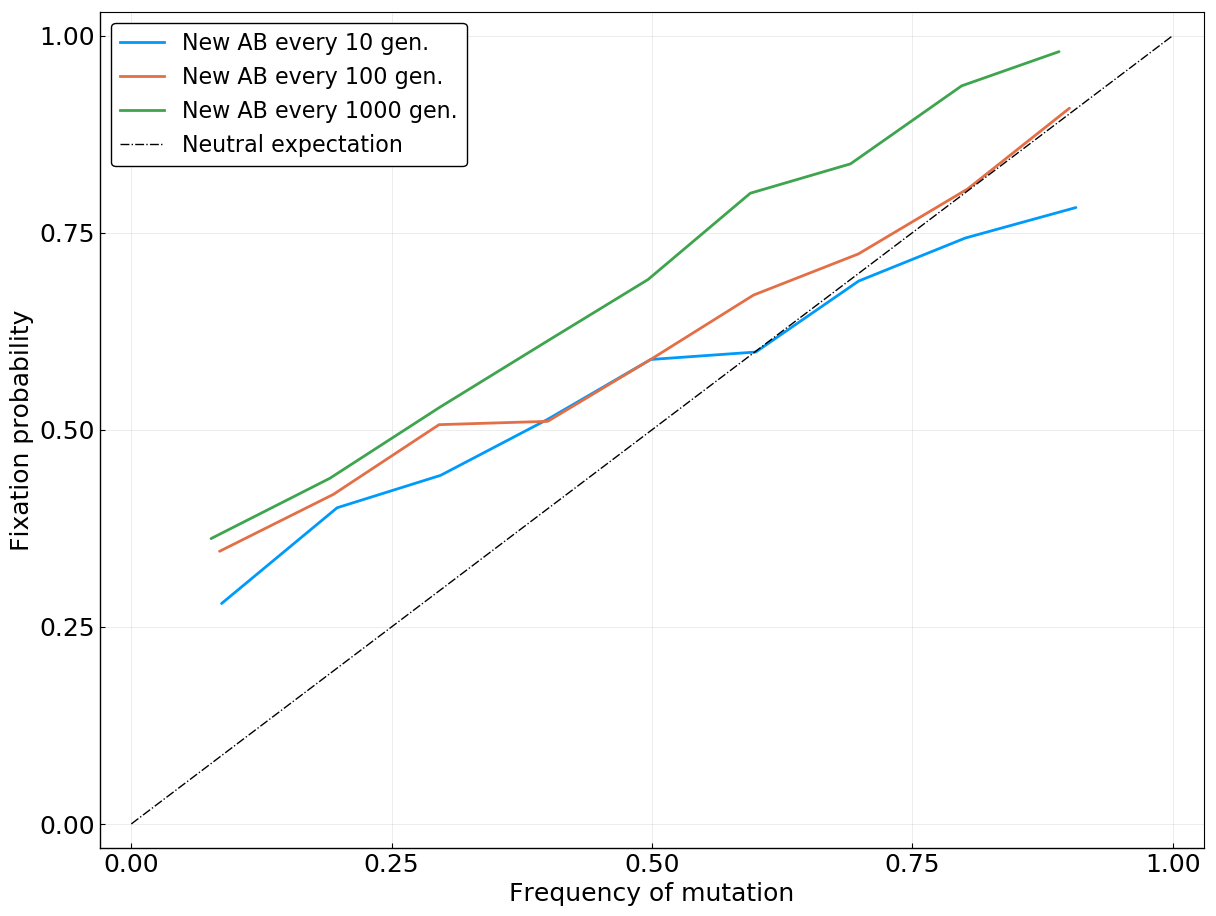

1000


In [15]:
# dat = vcat([[meanfreq(traj_fb[x]) pfix(traj_fb[x])] for x in alphabins_]...)
# err = [x*(1-x)/sqrt(length(traj_fb[x])) for x in alphabins_]

# 
p = plot(size = (1200,900))
for dt in dt_list[1:2:end]
    println(dt)
    aln = "../../../simulation/SimulatedData_AB/simulated_alignment_N10000_mueff0.001_s0.010_dt$(dt)_ABl5_nAB20_nf0.00_Vardt.txt"
    dat = plotdat(alltraj[dt], alphabins)
    plot!(p, dat[:,1], dat[:,2], label="New AB every $dt gen.", line=(2))
end
plot!(p, [0,1],[0,1], label="Neutral expectation", line=(1,:black,:dashdot))

plot!(xlabel="Frequency of mutation", ylabel="Fixation probability")
plot!(p, legendfontsize=lfs, titlefontsize=tfs, guidefontsize=alfs, tickfontsize=atfs, frame=:box)
savefig("$plotfolder/Pfix_v_freq_AB.png")

# Simple - var dt

In [23]:
dt_list = [10,100,1000]
alltraj = Dict()
for dt in dt_list[1:1:end]
    println(dt)
    aln = "../../../simulation/SimulatedData/simulated_alignment_N10000_mueff0.001_s0.010_dt$(dt).txt"
    alltraj[dt] = gettrajectories(aln)
end

10
Reading ../../../simulation/SimulatedData/simulated_alignment_N10000_mueff0.001_s0.010_dt10.txt...
Read 401501 strains out of 401501. Filtered 0. Could not read 0
100       
Reading ../../../simulation/SimulatedData/simulated_alignment_N10000_mueff0.001_s0.010_dt100.txt...
Read 800564 strains out of 800564. Filtered 0. Could not read 0
1000      
Reading ../../../simulation/SimulatedData/simulated_alignment_N10000_mueff0.001_s0.010_dt1000.txt...
Read 1200368 strains out of 1200368. Filtered 0. Could not read 0


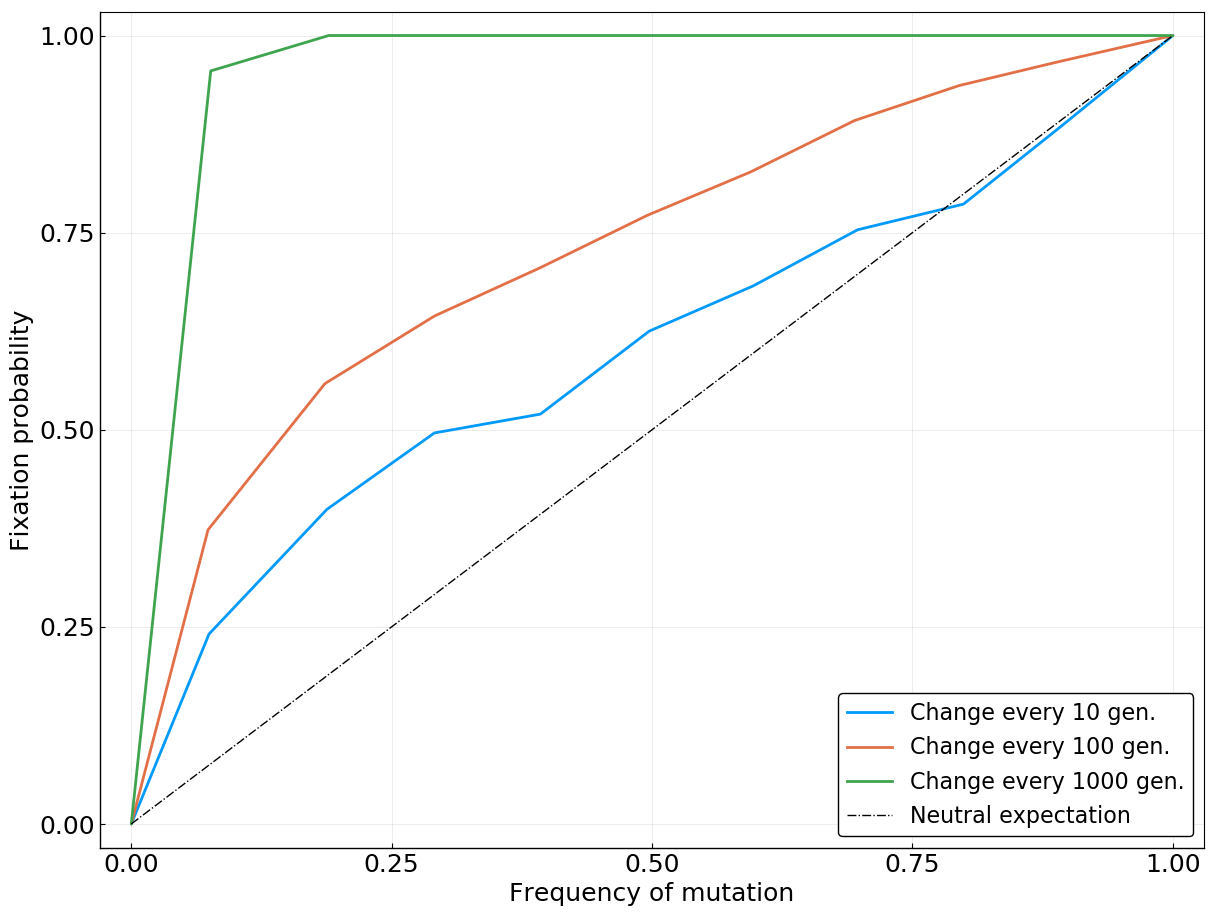

In [28]:
alphabins_ = 0.1:0.1:0.9
alphabins = [(a, 0.05) for a in alphabins_];
p = plot(size = (1200,900))
for dt in dt_list
    dat = plotdat(alltraj[dt], alphabins)
    plot!(p, vcat([0],dat[:,1], [1]), vcat([0],dat[:,2], [1]), label="Change every $dt gen.", line=(2))
end
plot!(p, [0,1],[0,1], label="Neutral expectation", line=(1,:black,:dashdot))

plot!(xlabel="Frequency of mutation", ylabel="Fixation probability")
plot!(p, legendfontsize=lfs, titlefontsize=tfs, guidefontsize=alfs, tickfontsize=atfs, frame=:box)
savefig(p, "$plotfolder/Pfix_v_freq_classic_vardt")

In [55]:
p1
savefig(p1, "$plotfolder/Pfix_v_freq_classic_vardt")

In [46]:
aln = "../../../simulation/SimulatedData/simulated_alignment_N10000_mueff0.001_s0.010_dt100.txt"
sp = FluTools.StrainPop(aln, seqtype=:artificial);

../../../simulation/SimulatedData/simulated_alignment_N10000_mueff0.001_s0.010_dt100.txt
../../../simulation/SimulatedData/simulated_alignment_N10000_mueff0.030_s0.010_dt100.txt
../../../simulation/SimulatedData/simulated_alignment_N10000_mueff0.010_s0.010_dt100.txt


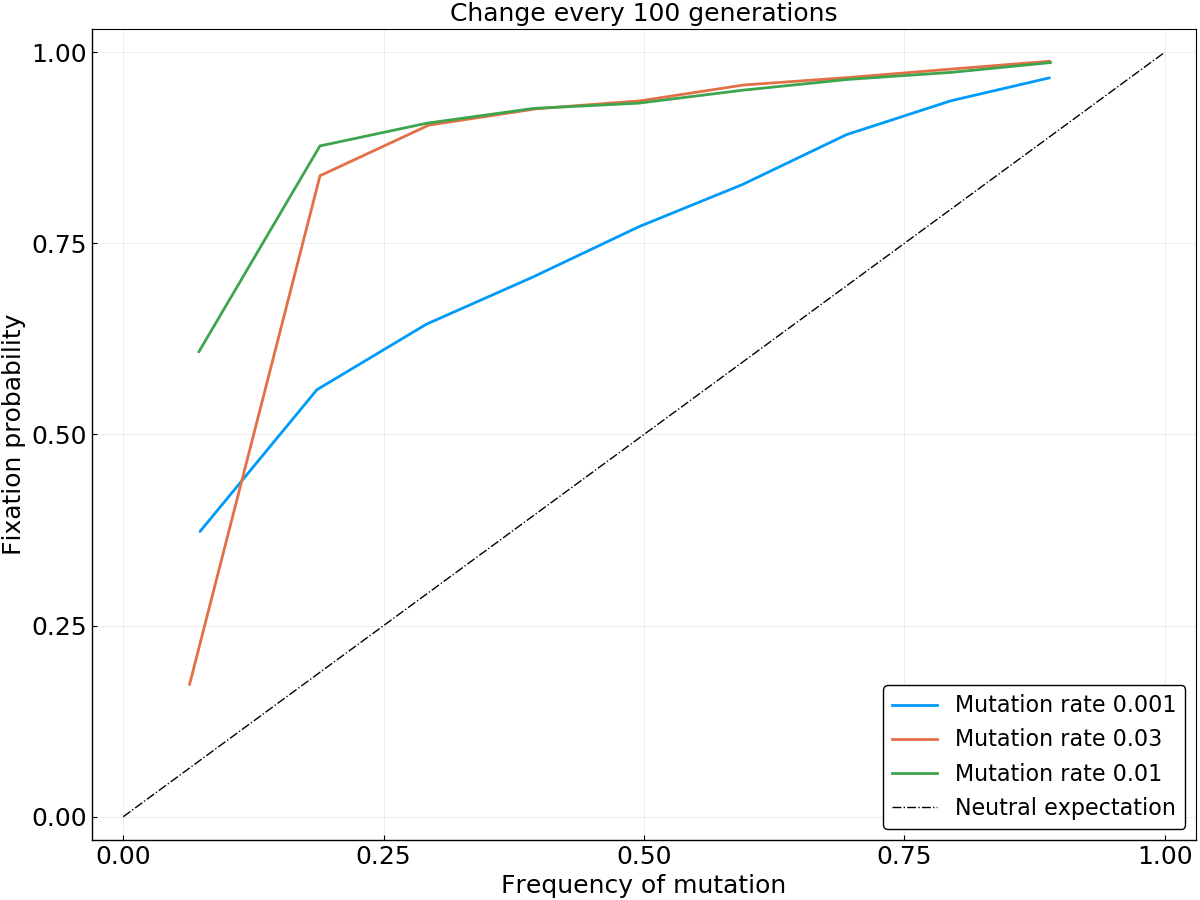

In [62]:
p = plot(size = (1200,900))
mu_list = [0.001, 0.03, 0.01]
for mu in mu_list
    aln = @sprintf("../../../simulation/SimulatedData/simulated_alignment_N10000_mueff%.3f_s0.010_dt100.txt", mu)
    dat = getdat(aln)
    plot!(p, dat[:,1], dat[:,2], label="Mutation rate $(mu)", line=(2))
end
plot!(p, [0,1],[0,1], label="Neutral expectation", line=(1,:black,:dashdot))
plot!(p, title="Change every 100 generations")
plot!(xlabel="Frequency of mutation", ylabel="Fixation probability")
plot!(p, legendfontsize=lfs, titlefontsize=tfs, guidefontsize=alfs, tickfontsize=atfs, frame=:box)